使用python 实现线性回归算法。
向量运算使用numpy

核心数学公式
<img src="./images/functions.PNG" />


In [12]:

import numpy as np
class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iters=3000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(slef,z):
        return 1.0/(1+np.exp(-z))


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            # compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X):
        y_pred_prob = self.predict_prob(X)
        y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
        return y_pred
        

In [27]:
import numpy as np

class LogisticRegression1:
    def __init__(self):
        self.theta_ = None

    def sigmoid(slef,z):
        return 1.0/(1+np.exp(-z))
    
    # 损失函数（交叉熵损失）
    def compute_loss(self,X, y, theta):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        epsilon = 1e-15  # 防止log(0)
        h_clipped = np.clip(h, epsilon, 1 - epsilon)
        loss = -1/m * (np.dot(y.T, np.log(h_clipped)) + np.dot((1 - y).T, np.log(1 - h_clipped)))
        return loss
    
    # 梯度下降算法
    def gradient_descent(self,X, y,  learning_rate=0.1, num_iterations=10000):
        m = len(y)
        cost_history = np.zeros(num_iterations)
    
        for i in range(num_iterations):
            gradients = (1/m) * np.dot(X.T, (self.sigmoid(np.dot(X, self.theta)) - y))
            self.theta -= learning_rate * gradients
            cost_history[i] = self.compute_loss(X, y, self.theta)

            if i % 1000 == 0:
                print(f"Iteration: {i}, Loss: {cost_history[i]}, Theta: {self.theta}")
    
        return  cost_history
    
    def fit(self, X, y,  learning_rate=0.1, num_iterations=10000):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        n_samples, n_features = X.shape

        # init parameters
        self.theta = np.zeros(n_features)

        # gradient descent
        cost_history = self.gradient_descent(X, y,learning_rate,num_iterations)

        return self
    
    def predict_prob(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        linear_model = np.dot(X, self.theta)
        return self.sigmoid(linear_model)

    def predict(self, X):
        y_pred_prob = self.predict_prob(X)
        y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
        return y_pred

In [16]:
#load data
import pandas as pd

data = pd.read_csv('data/examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


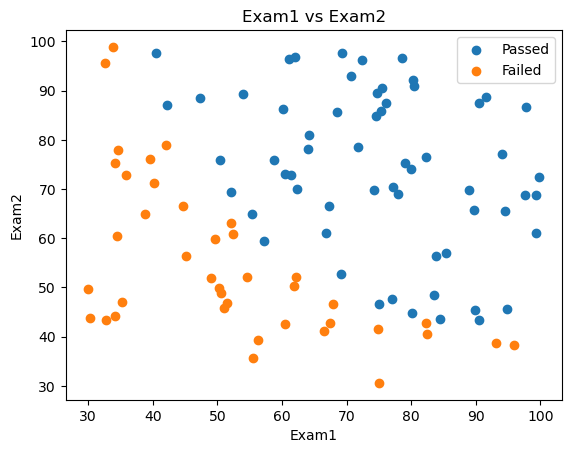

In [17]:
import matplotlib.pyplot as plt

#add label mask
mask = data.loc[:,'Pass'] == 1
fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed=plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1 vs Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('Passed','Failed'))
plt.show()

In [18]:
#define X,Y
X = data.drop(['Pass'],axis=1)
y = data.loc[:,'Pass']
X1 = data.loc[:,'Exam1']
X2 = data.loc[:,'Exam2']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Pass, dtype: int64

In [10]:
#establishing the model to train it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#training the model
LR.fit(X, y)

LogisticRegression()

In [11]:
#show the prediction result of the logistic regression model
y_pred = LR.predict(X)
print(y_pred)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [29]:
model = LogisticRegression1()
#training the model
model.fit(X, y)

#show the prediction result of the logistic regression model
y_pred = model.predict(X)
print(y_pred)

Iteration: 0, Loss: 13.815830396936354, Theta: [0.01       1.20092166 1.12628422]
Iteration: 1000, Loss: 20.194928315187855, Theta: [-7.72140269  1.56363065 -3.29426932]
Iteration: 2000, Loss: 13.815830396936354, Theta: [-15.35775509   5.67318741   0.97315215]
Iteration: 3000, Loss: 13.149162899148225, Theta: [-23.08423148   3.85842309  -1.03020464]
Iteration: 4000, Loss: 19.932654237234384, Theta: [-30.81073178   1.76865692  -3.02041423]
Iteration: 5000, Loss: 13.815830396936354, Theta: [-38.43981199   6.01515155   1.28271522]
Iteration: 6000, Loss: 12.691555410025392, Theta: [-46.1610468    3.91395842  -0.89421814]
Iteration: 7000, Loss: 19.87647910853937, Theta: [-53.87679316   1.94405322  -2.83800319]
Iteration: 8000, Loss: 13.815830396936354, Theta: [-61.48923458   6.13844401   1.36695026]
Iteration: 9000, Loss: 12.196292775700474, Theta: [-69.18926952   4.09972438  -0.75332092]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1